In [105]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [106]:
#Load dataset in csv to pandas dataframe
expresso_df = pd.read_csv("Expresso_churn_dataset.csv")
expresso_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [107]:
expresso_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [108]:
# Check for missing values
expresso_df.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [109]:
# Impute missing values in numerical features using SimpleImputer with 'mean' strategy
num_cols = expresso_df.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='most_frequent')
X_num = expresso_df[num_cols]
X_num_imputed = imputer.fit_transform(X_num)
X_num_imputed = pd.DataFrame(X_num_imputed, columns=num_cols)

In [110]:
# Impute missing values in categorical features using SimpleImputer with 'most_frequent' strategy
cat_cols = expresso_df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_cat = expresso_df[cat_cols]
X_cat_imputed = cat_imputer.fit_transform(X_cat)
X_cat_imputed = pd.DataFrame(X_cat_imputed, columns=cat_cols)

In [111]:
# Update the original DataFrame with the imputed data
expresso_df[num_cols] = X_num_imputed
expresso_df[cat_cols] = X_cat_imputed

In [112]:
expresso_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54.0,On net 200F=Unlimited _call24H,8.0,0.0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,DAKAR,I 18-21 month,500.0,1.0,500.0,167.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NO,4.0,All-net 500F=2000F;5d,1.0,1.0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,DAKAR,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,0.0,90.0,46.0,7.0,0.0,0.0,NO,17.0,On-net 1000F=10MilF;10d,1.0,0.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,0.0,0.0,NO,62.0,"Data:1000F=5GB,7d",11.0,0.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,0.0,39.0,24.0,1.0,0.0,0.0,NO,11.0,Mixt 250F=Unlimited_call24H,2.0,0.0


In [113]:
expresso_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      float64
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           float64
dtypes: float64(14), object(5)
memory usage: 312.2+ MB


In [114]:
# Check for missing values
expresso_df.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [115]:
expresso_df.duplicated().sum()

0

In [116]:
expresso_df.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

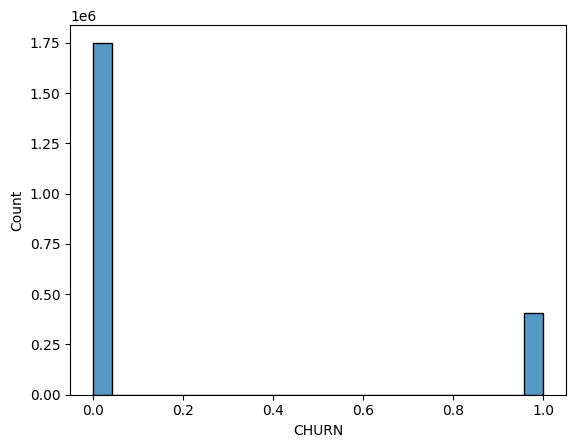

In [117]:
sns.histplot(expresso_df['CHURN'])
plt.show()

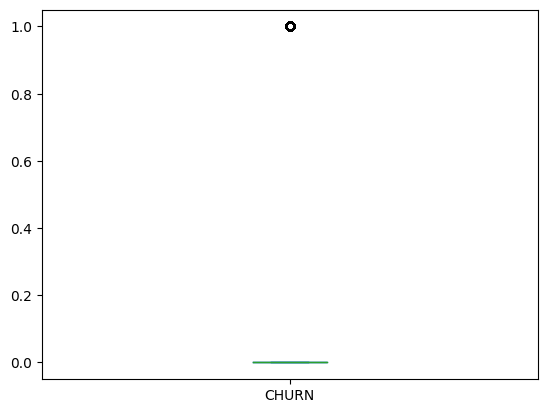

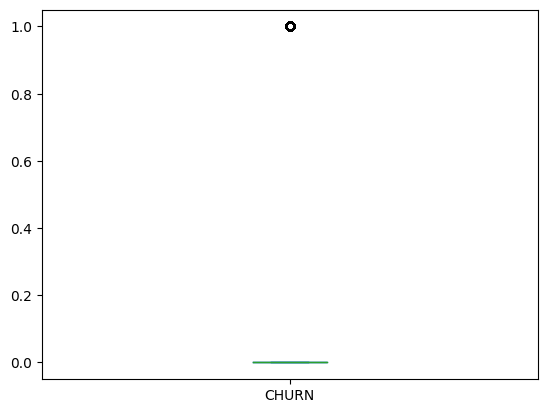

In [93]:
expresso_df['CHURN'].plot(kind='box') #to check for outliers
plt.show()

In [118]:
# Turn categorical values to numerical using label encoding
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

In [119]:
expresso_col = expresso_df.select_dtypes(include=['object']).columns
expresso_col

Index(['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK'], dtype='object')

Index(['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK'], dtype='object')

In [96]:
for col in expresso_col: # Convert Categorical Data to Numerical
    expresso_df[col] = label.fit_transform(expresso_df[col])


In [97]:
# Select your target variable and features
features = ['REGION','TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK']

X = expresso_df[features].values
y = expresso_df['CHURN'].values

In [98]:
# Standardize data to avoid high variations in the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.22100196,  0.17326418,  0.07825276, ...,  1.16471371,
         1.72840392,  0.2149536 ],
       [-0.66061787, -2.76706362, -0.52566479, ..., -1.07877424,
        -0.65862112, -0.470729  ],
       [-0.66061787,  0.17326418, -0.02642628, ..., -0.49546737,
         1.75522442, -0.470729  ],
       ...,
       [ 2.41669347,  1.64342808, -0.52566479, ..., -0.67494641,
         2.61348062, -0.470729  ],
       [ 2.41669347,  1.64342808, -0.52566479, ..., -0.8992952 ,
         2.61348062, -0.470729  ],
       [ 2.41669347,  1.64342808, -0.52566479, ..., -1.21338351,
         2.61348062, -0.470729  ]])

In [99]:
#import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [100]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [102]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n',class_report)

Accuracy: 0.8652750668183243
Confusion Matrix:
 [[317655  29552]
 [ 28013  52058]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.91      0.92    347207
         1.0       0.64      0.65      0.64     80071

    accuracy                           0.87    427278
   macro avg       0.78      0.78      0.78    427278
weighted avg       0.87      0.87      0.87    427278



In [103]:
!pip install pypickle

In [120]:
import pypickle
filepath = 'expressodf.pki'
pypickle.save(filepath, model)

[pypickle] Pickle file saved: [expressodf.pki]


True